# Support Vector Machines (SVM)

## Introduction

<div style="display:none">
    <span style="display:none" id="i">W3sicXVlc3Rpb24iOiAiV2hpY2ggb2YgdGhpcyBncmFwaHMgc2hvd3MgZ29vZCBtYXJnaW4/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICI8aW1nIHNyYz1cIm9wdGlvbjEucG5nXCIgYWx0PVwiT3B0aW9uIDFcIj4iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICI8aW1nIHNyYz1cIm9wdGlvbjIucG5nXCIgYWx0PVwiT3B0aW9uIDJcIj4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIn1dfV0=</span>

<span style="display:none" id="b">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgcHJpbWFyeSBwdXJwb3NlIG9mIFNWTT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkNsYXNzaWZpY2F0aW9uIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiUmVncmVzc2lvbiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QuIn0sIHsiYW5zd2VyIjogIkNsdXN0ZXJpbmciLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIn0sIHsiYW5zd2VyIjogIiBEaW1lbnNpb25hbGl0eSByZWR1Y3Rpb24iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIn1dfV0=</span>
<span style="display:none" id="c1">W3sicXVlc3Rpb24iOiAiSW4gU1ZNLCB0aGUgZGltZW5zaW9uIG9mIHRoZSBoeXBlcnBsYW5lIGRlcGVuZHMgdXBvbiB3aGljaCBvbmU/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUaGUgbnVtYmVyIG9mIGZlYXR1cmVzIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiVGhlIG51bWJlciBvZiBzYW1wbGVzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIldyb25nLiJ9LCB7ImFuc3dlciI6ICJ0aGUgbnVtYmVyIG9mIHRhcmdldCB2YXJpYWJsZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIn0sIHsiYW5zd2VyIjogIkFsbCBvZiB0aGUgYWJvdmUiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIn1dfV0=</span>
<span style="display:none" id="c2">W3sicXVlc3Rpb24iOiAiSG93IG1hbnkgZGltZW5zaW9ucyBkb2VzIGEgaHlwZXJwbGFuZSBoYXZlIGluIGEgc3VwcG9ydCB2ZWN0b3IgbWFjaGluZSB3aGVuIHRoZSBpbnB1dCBmZWF0dXJlcyBhcmUgNT8iLCAidHlwZSI6ICJudW1lcmljIiwgInByZWNpc2lvbiI6IDEwLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiA0LCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0LiJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbLTEwMDAwMDAwMCwgLTFlLTA5XSwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIldyb25nLiBUcnkgYWdhaW4uIn0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFs0LjAwMDAwMDEsIDEwMDAwMDAwMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJXcm9uZy4gVHJ5IGFnYWluLiJ9XX1d</span>
<span style="display:none" id="h">W3sicXVlc3Rpb24iOiAiU3VwcG9zZSB5b3UgYXJlIHdvcmtpbmcgb24gYSBwcm9qZWN0IHRvIGNsYXNzaWZ5IGltYWdlcyBvZiBoYW5kd3JpdHRlbiBkaWdpdHMgdXNpbmcgYSBTdXBwb3J0IFZlY3RvciBNYWNoaW5lIChTVk0pLiBUaGUgaW1hZ2VzIHZhcnkgaW4gY29tcGxleGl0eSBhbmQgbWF5IGhhdmUgc29tZSBpcnJlZ3VsYXJpdGllcy4gSW4gdGhpcyBjb250ZXh0LCB3aGljaCBTVk0gc3RyYXRlZ3kgd291bGQgYmUgbW9yZSBhcHByb3ByaWF0ZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkhhcmQgTWFyZ2luIFNWTSAtIE1heGltaXplIHRoZSBkaXN0YW5jZSBiZXR3ZWVuIHRoZSBsaW5lIGFuZCB0aGUgbmVhcmVzdCBwb2ludHMsIHN1aXRhYmxlIGZvciBwZXJmZWN0bHkgc2VwYXJhYmxlIGltYWdlcyB3aXRob3V0IGlycmVndWxhcml0aWVzLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJXcm9uZy4ifSwgeyJhbnN3ZXIiOiAiU29mdCBNYXJnaW4gU1ZNIC0gQWxsb3dzIGZvciBhIG1vcmUgZmxleGlibGUgYXBwcm9hY2gsIHBlcm1pdHRpbmcgc29tZSBpbWFnZXMgdG8gYmUgbWlzY2xhc3NpZmllZCwgbWFraW5nIGl0IG1vcmUgcm9idXN0IHRvIG5vaXNlIG9yIGlycmVndWxhcml0aWVzLiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QuIn0sIHsiYW5zd2VyIjogIkhhcmQgTWFyZ2luIFNWTSAtIEFsbG93cyBmb3IgYSBtb3JlIGZsZXhpYmxlIGFwcHJvYWNoLCBwZXJtaXR0aW5nIHNvbWUgaW1hZ2VzIHRvIGJlIG1pc2NsYXNzaWZpZWQsIG1ha2luZyBpdCBtb3JlIHJvYnVzdCB0byBub2lzZSBvciBpcnJlZ3VsYXJpdGllcy4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIn0sIHsiYW5zd2VyIjogIiBTb2Z0IE1hcmdpbiBTVk0gLSBSZXF1aXJlcyBhIHN0cmljdCBzZXBhcmF0aW9uLCBzdWl0YWJsZSBmb3IgZGF0YXNldHMgd2l0aCB3ZWxsLWRlZmluZWQgcGF0dGVybnMgYW5kIG1pbmltYWwgdmFyaWF0aW9uIGluIGRhdGEgZGlzdHJpYnV0aW9uLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJXcm9uZy4ifV19XQ==</span>
<span style="display:none" id="x">W3sicXVlc3Rpb24iOiAiV2hpY2ggb2YgdGhlIGZvbGxvd2luZyBhcmUgcmVhbC13b3JsZCBhcHBsaWNhdGlvbnMgb2YgdGhlIFNWTT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkNsdXN0ZXJpbmcgb2YgTmV3cyBBcnRpY2xlcyIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QuIn0sIHsiYW5zd2VyIjogIkxhcmdlLXNjYWxlIGUtY29tbWVyY2UiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIn0sIHsiYW5zd2VyIjogIk9ubGluZSBMZWFybmluZyIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJXcm9uZy4ifSwgeyJhbnN3ZXIiOiAiSW1hZ2UgQ2xhc3NpZmljYXRpb24iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0LiJ9XX1d</span>

</div>



Let's break down Support Vector Machines (SVMs) in simple terms. Imagine you have a bunch of dots on a piece of paper, and these dots belong to two different groups, let's say red and blue. Now, you want to draw a line on the paper in such a way that it separates the red dots from the blue dots as much as possible. 

Support Vector Machines do something similar in a more advanced way. Instead of just a line, SVMs find the best possible "boundary" (could be a line, plane, or more complex shape depending on the data) to separate different groups. The key is to find a boundary in such a way that there is as much space as possible between the dots of different groups. 

Now, the "support vectors" in SVM are the dots that are closest to the boundary. Think of them as the most important dots for figuring out where the boundary should go. The SVM aims to maximize the distance between the support vectors and the boundary.

In simple terms, SVM helps classify things into different groups by finding the best way to draw a boundary between them, considering the support vectors and maximizing the space between groups. It's like finding the optimal line or curve that best separates different types of data points on a graph.

```{tip}
In the context of our example, boundary or line that separates these two groups is **hyperplane**. Space between the boundary (the line that separates the two groups) and the nearest dots of each group is **margin**. Both of these terms will be described below
```

In [25]:
from jupyterquiz import display_quiz
display_quiz('#b')

<IPython.core.display.Javascript object>

In [18]:
display_quiz('#c1')

<IPython.core.display.Javascript object>

### Hyperplanes

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3. 

In [16]:
display_quiz("#c2") #поменять

<IPython.core.display.Javascript object>

In [6]:
display_quiz("#a4") #поменять

<IPython.core.display.Javascript object>

### Margin
<a id='margin_1'></a>

The margin is the distance between the hyperplane and the closest data points from either class. The optimal hyperplane is the one that maximizes the margin between the two classes. The margin is important because it helps the model generalize better on unseen data.

## Understanding the mathematics behind SVM

Many people skip the math intuition behind this algorithm because it is pretty hard to digest. Here in this section, we’ll try to understand each and every step working under the hood.

### Use of Dot Product in SVM

Consider a random point X and we want to know whether it lies on the right side of the plane or the left side of the plane (positive or negative).

<img src="./svm/math_2.png" alt="sfsdgeg" />

To find this first we assume this point is a vector $x$ and then we make a vector $w$ which is perpendicular to the hyperplane. Let’s say the distance of vector $w$ from origin to decision boundary is $b$. Now we take the projection of $x$ vector on $w$.

<img src="./svm/math_3.png" alt="sfsdgeg" />

We already know that projection of any vector or another vector is called [dot-product](https://en.wikipedia.org/wiki/Dot_product#:~:text=In%20mathematics%2C%20the%20dot%20product,two%20vectors%20is%20widely%20used.). Hence, we take the dot product of $x$ and $w$ vectors. If the dot product is greater than ‘$b$’ then we can say that the point lies on the right side. If the dot product is less than ‘$b$’ then the point is on the left side and if the dot product is equal to ‘$b$’ then the point lies on the decision boundary.

$\overrightarrow{x} \cdot \overrightarrow{w} = b$ *(the point lies on the decision boundary)*<br/>
$\overrightarrow{x} \cdot \overrightarrow{w} > b$ *(positive samples)*<br/>
$\overrightarrow{x} \cdot \overrightarrow{w} > b$ *(negative samples)*

### Equation of the Hyperplane, Margin

This equation is derived from two-dimensional vectors. But in fact, it also works for any number of dimensions. Equation of the hyperplane:

$$H = \langle x, w \rangle - b$$

Distance from a data point to the hyperplane or margin:<br/>

$$M = \frac{1}{\Vert w \Vert}$$

In [21]:
display_quiz("#h")

<IPython.core.display.Javascript object>

#### Classification problem

Now based on previous information, let's formulate SVM classification problem.

In task of SVM classification problem where 
$x = \mathbb{R}^p$ and $y = \{-1, +1\}$, we aim to find parameters $w$ in $\mathbb{R}^p$ and $b$ in $\mathbb{R}$. The classification algorithm $a(x, w)$ is defined as $\text{sign}(\langle x, w \rangle - b)$.

The sign function is used to determine whether a point lies on one side or the other of the hyperplane. If $a(x,w)>0$ the point is classified as belonging to class +1, and if $a(x,w)<0$, the point is classified as belonging to class −1.

In SVM, the objective is to find the hyperplane that maximizes <a href="#margin_1">margin</a>

Now let's see some visualization of hyperplane on randomly generated data


In [20]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider

def decision_boundary_plot(w1, w2, b):
    w = np.array([w1, w2])
    
    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = np.sign(np.dot(X, w) - b)

    scatter_trace = go.Scatter(
        x=X[:, 0],
        y=X[:, 1],
        mode='markers',
        marker=dict(color=y, colorscale='Viridis', line=dict(color='black', width=1)),
    )

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 50))

    decision_values = np.dot(np.c_[xx.ravel(), yy.ravel()], w) - b
    margin = 1 / np.sqrt(np.sum(w**2))

    contour_trace = go.Contour(
        x=xx[0, :],
        y=yy[:, 0],
        z=decision_values.reshape(xx.shape),
        colorscale='Viridis',
        contours=dict(start=-margin, end=margin, size=margin, coloring='lines'),
        line=dict(width=2),
    )

    layout = go.Layout(
        xaxis=dict(title='X1'),
        yaxis=dict(title='X2'),
        title='SVM Hyperplane',
    )

    fig = go.Figure(data=[scatter_trace, contour_trace], layout=layout)
    fig.show()

# Create sliders
w1_slider = FloatSlider(value=1, min=-2, max=5, step=0.1, description='w1')
w2_slider = FloatSlider(value=1, min=-2, max=3, step=0.1, description='w2')
b_slider = FloatSlider(value=0, min=-2, max=3, step=0.1, description='b')

# Create interactive plot
interact(decision_boundary_plot, w1=w1_slider, w2=w2_slider, b=b_slider);


interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-2.0), FloatSlider(value=1.0, desc…

### Maximazing margin

Take a look to the plot below.

Let's define $H_0$, $H_1$, $H_2$ as planes:

$H_0$: $\langle w, x_i \rangle+b = 0$

$H_1$: $\langle w, x_i \rangle+b = 1$

$H_2$: $\langle w, x_i \rangle+b = -1$


Recall the distance from a point to a line:
$w_1x1+w_2x2+b = 0$ is: 

$$\frac {|w_1x1_0 +w_2x2_0 + b|}{\sqrt(w_1^2+w_2^2)}$$

The distance between $H_0$ and $H_1$(margin) is then:

$$\frac{\vert\langle w, x \rangle +b\vert}{\Vert w \Vert}=\frac 1{\Vert w \Vert}$$
The total distance between $H1$ and $H2$ is thus: $\frac 2{\Vert w \Vert}$

So, to maximaze margin, we should minimize $\Vert w \Vert$

Minimization of $\Vert w \Vert$ is often achieved through the process of optimization, which will not be covered in this chapter

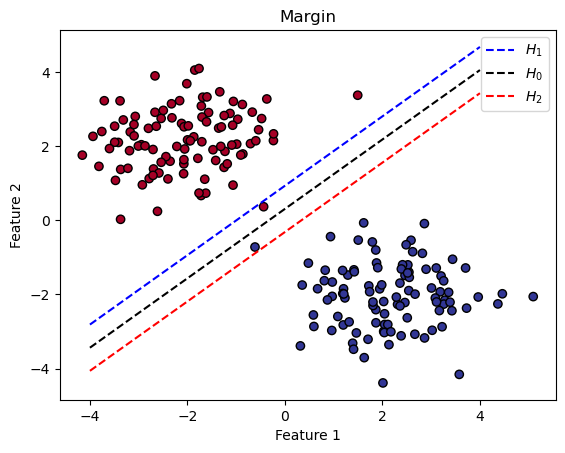

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(429)

# Number of samples for each class
num_samples = 100

# Generate data for the first class (upper-left corner)
class1_x = np.random.normal(loc=-2, scale=1, size=num_samples)
class1_y = np.random.normal(loc=2, scale=1, size=num_samples)
class1 = np.column_stack((class1_x, class1_y))

# Generate data for the second class (lower-right corner)
class2_x = np.random.normal(loc=2, scale=1, size=num_samples)
class2_y = np.random.normal(loc=-2, scale=1, size=num_samples)
class2 = np.column_stack((class2_x, class2_y))

# Combine the two classes
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, marker='o', edgecolors='k')
plt.title('Margin')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# SVM hyperplane parameters (weights and bias)
w = np.array([-1.5, 1.6])  # Adjust these weights for illustration purposes
b = -0.5  # Adjust this bias for illustration purposes

# Define the hyperplanes H0, H1, and H2
def plot_hyperplane(w, b, color, linestyle, label):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x_vals = np.linspace(-4, 4, 100)
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, linestyle, color=color, label=label)

# Plot the hyperplanes
plot_hyperplane(w, b - 1, 'blue', '--', '$H_1$')
plot_hyperplane(w, b, 'black', '--', '$H_0$')
plot_hyperplane(w, b + 1, 'red', '--', '$H_2$')

# Add legend
plt.legend()

# Show the plot
plt.show()


Now let's take a look on work of linear SVM on Iris Dataset

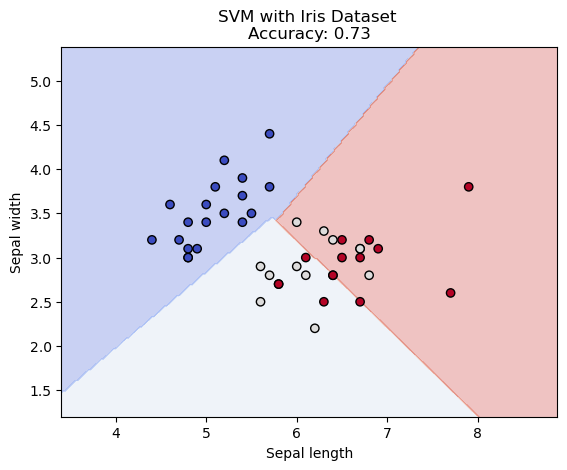

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from ipywidgets import interactive

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM model with a linear kernel
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Calculate accuracy on the test set
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Function to plot decision boundaries and accuracy
def plot_decision_boundary(model, X, y, accuracy):
    h = .02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'SVM with Iris Dataset \nAccuracy: {accuracy:.2f}')
    plt.show()

# Plot the decision boundaries and accuracy
plot_decision_boundary(svm_model, X_test, y_test, accuracy)

## Kernels in Support Vector Machine

The most interesting feature of SVM is that it can even work with a non-linear dataset and for this, we use “Kernel Trick” which makes it easier to classifies the points. Suppose we have a dataset like this:

<img src="./svm/kernel_1.png" alt="sfsdgeg" />

Here we see we cannot draw a single line or say hyperplane which can classify the points correctly. So what we do is try converting this lower dimension space to a higher dimension space using some quadratic functions which will allow us to find a decision boundary that clearly divides the data points. These functions which help us do this are called Kernels and which kernel to use is purely determined by hyperparameter tuning. Among the array of kernels, the polynomial kernel stands out as a versatile choice.

<img src="./svm/kernel_2.png" alt="sfsdgeg" />

### Polynomial kernel

The polynomial kernel, expressed as $K(xi,xj)=(\langle x_i,xj \rangle+1)^p$, introduces a tunable parameter $p$, determining the degree of the polynomial.

Mathematically, the kernel function computes the dot product between the mapped data points in the higher-dimensional space without explicitly calculating the coordinates of those points

Unlike the linear SVM, the polynomial kernel enables the SVM to operate in a more complex feature space, accommodating intricate relationships within the data.


```{admonition} Reminder
:class: tip
The addition of 1 to the dot product in the polynomial kernel is a technique known as the "bias trick" or "offset trick." This addition is introduced to ensure that even when the dot product $x_i$ and $x_j$​ is zero, the resulting value after adding 1 will be non-zero
```

Let's see visualization that underlines this feature

In [13]:
import numpy as np
from sklearn import svm
from sklearn.datasets import make_circles
import plotly.graph_objects as go

X, y = make_circles(n_samples=100, factor=.3, noise=.05)

clf = svm.SVC(kernel='poly', degree=2, C=1.0)
clf.fit(X, y)

r = np.exp(-(X ** 2).sum(1))

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z = np.array([clf.predict([[x, y]]) for x, y in zip(np.ravel(X_mesh), np.ravel(Y_mesh))])
Z = Z.reshape(X_mesh.shape)

scatter2d = go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=y, colorscale='Viridis', size=8, showscale=True))

scatter3d = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=r, mode='markers', marker=dict(color=y))

surface = go.Surface(x=X_mesh, y=Y_mesh, z=Z, colorscale='YlGnBu', opacity=0.6)

layout2d = go.Layout(title='2D representation of data')
fig2d = go.Figure(data=[scatter2d], layout=layout2d)
fig2d.show()

layout3d = go.Layout(title='3D transformation with polynomial kernel')
fig3d = go.Figure(data=[scatter3d, surface], layout=layout3d)
fig3d.show()


```{note}
Evaluating $K$ only requires one addition and one exponentiation more than the original dot product
```

As we can see, with the help of kernal, two-dimensional data was transferred to three-dimensional space, which made it possible to classify data that would not have been possible to classify with a conventional linear SVM

In [20]:
display_quiz("#x")

<IPython.core.display.Javascript object>